<a href="https://colab.research.google.com/github/Imddong2/LG/blob/main/Time_Series_Practice_addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 분석 실습

## Contents
1. 시계열 예측

  1-1) 데이터셋 불러오기

  1-2) 데이터 EDA

  1-3) 데이터 전처리

  1-4) 모델 생성 및 실행

  1-5) 결과 시각화 및 살펴보기


2. 시계열 분류

  2-1) 데이터셋 불러오기

  2-2) 데이터 EDA 및 데이터 전처리

  2-3) 모델 생성 및 실행

  2-4) 평가

---

# 1. 시계열 예측

## 1-1) 데이터셋 불러오기

In [ ]:
import pandas as pd

In [ ]:
shampoo = pd.read_csv('https://raw.githubusercontent.com/enopus/time-series-practice/main/shampoo_data.csv')
shampoo

,Month,Sales
0,2001-01,266
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3
5,2001-06,168.5
6,2001-07,231.8
7,2001-08,224.5
8,2001-09,192.8
9,2001-10,122.9


## 1-2) 데이터 EDA


In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 14.9 MB/s 
     |████████████████████████████████| 3.1 MB 81.0 MB/s 
     |████████████████████████████████| 690 kB 63.9 MB/s 
     |████████████████████████████████| 10.9 MB 52.4 MB/s 
     |████████████████████████████████| 596 kB 69.1 MB/s 
     |████████████████████████████████| 303 kB 86.4 MB/s 
     |████████████████████████████████| 102 kB 12.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 65.8 MB/s 
     |████████████████████████████████| 38.1 MB 2.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=44f0ef238723ebf47cd9f548e7d08cc4dc934e618bf45f89fac7094a431a4421
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=cde77e75a1c9056a02d1ea20c1f02f0d34d4ea85098b97e93da0ba2e5cac3b4e


In [ ]:
import pandas_profiling

In [ ]:
shampoo_report = shampoo.profile_report()
shampoo_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1-3) 데이터 전처리

In [ ]:
reindex_shampoo = shampoo.set_index('Month', inplace=False)
reindex_shampoo

,Sales
Month,
2001-01,266
2001-02,145.9
2001-03,183.1
2001-04,119.3
2001-05,180.3
2001-06,168.5
2001-07,231.8
2001-08,224.5
2001-09,192.8


In [ ]:
# reindex_shampoo.dropna(axis=0)
# reindex_shampoo.fillna(0)

preprocessed_shampoo = reindex_shampoo.loc['2001-01':'2003-12']
preprocessed_shampoo

,Sales
Month,
2001-01,266
2001-02,145.9
2001-03,183.1
2001-04,119.3
2001-05,180.3
2001-06,168.5
2001-07,231.8
2001-08,224.5
2001-09,192.8


In [ ]:
shampoo_report = shampoo.profile_report()
shampoo_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.close('all')

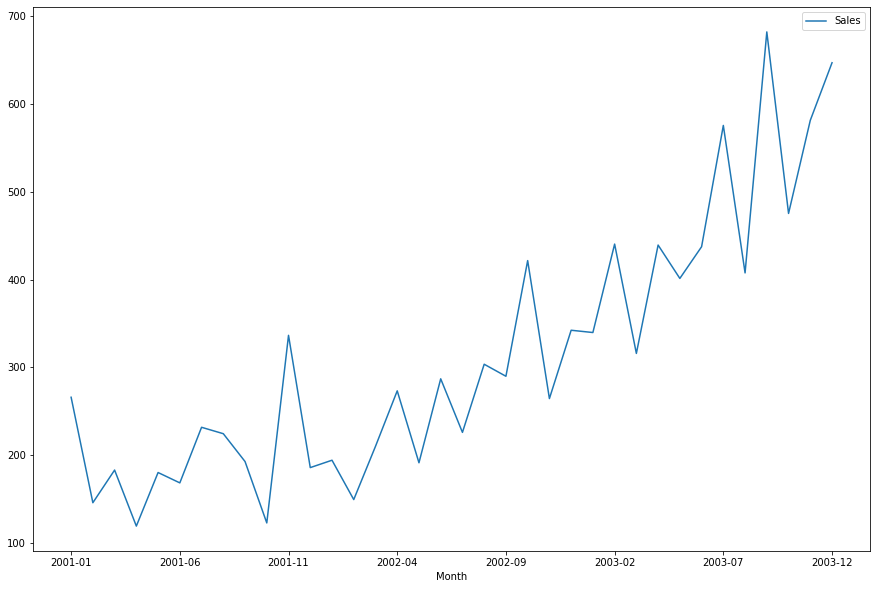

In [ ]:
# preprocessed_shampoo.plot(x='Month', y='Sales')
preprocessed_shampoo = preprocessed_shampoo.astype(float)
preprocessed_shampoo.plot(y='Sales', use_index=True, figsize=(15, 10))
plt.show()

### ◆ 데이터 분할

In [ ]:
sales = preprocessed_shampoo['Sales']
sales = list(sales)
sales

[266.0,
 145.9,
 183.1,
 119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 287.0,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5,
 342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0,
 475.3,
 581.3,
 646.9]

In [ ]:
x = []
y = []

for i in enumerate(sales):
  if i[0] < 3:
    continue
  
  else:
    previous_t3 = sales[i[0]-3]
    previous_t2 = sales[i[0]-2]
    previous_t1 = sales[i[0]-1]
    current_t = sales[i[0]]

    x.append([previous_t3, previous_t2, previous_t1])
    y.append(current_t)

print(x)
print('=========================================')
print(y)

[[266.0, 145.9, 183.1], [145.9, 183.1, 119.3], [183.1, 119.3, 180.3], [119.3, 180.3, 168.5], [180.3, 168.5, 231.8], [168.5, 231.8, 224.5], [231.8, 224.5, 192.8], [224.5, 192.8, 122.9], [192.8, 122.9, 336.5], [122.9, 336.5, 185.9], [336.5, 185.9, 194.3], [185.9, 194.3, 149.5], [194.3, 149.5, 210.1], [149.5, 210.1, 273.3], [210.1, 273.3, 191.4], [273.3, 191.4, 287.0], [191.4, 287.0, 226.0], [287.0, 226.0, 303.6], [226.0, 303.6, 289.9], [303.6, 289.9, 421.6], [289.9, 421.6, 264.5], [421.6, 264.5, 342.3], [264.5, 342.3, 339.7], [342.3, 339.7, 440.4], [339.7, 440.4, 315.9], [440.4, 315.9, 439.3], [315.9, 439.3, 401.3], [439.3, 401.3, 437.4], [401.3, 437.4, 575.5], [437.4, 575.5, 407.6], [575.5, 407.6, 682.0], [407.6, 682.0, 475.3], [682.0, 475.3, 581.3]]
[119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287.0, 226.0, 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3, 646.9]


In [ ]:
x_train = x[:-3]
x_train

[[266.0, 145.9, 183.1],
 [145.9, 183.1, 119.3],
 [183.1, 119.3, 180.3],
 [119.3, 180.3, 168.5],
 [180.3, 168.5, 231.8],
 [168.5, 231.8, 224.5],
 [231.8, 224.5, 192.8],
 [224.5, 192.8, 122.9],
 [192.8, 122.9, 336.5],
 [122.9, 336.5, 185.9],
 [336.5, 185.9, 194.3],
 [185.9, 194.3, 149.5],
 [194.3, 149.5, 210.1],
 [149.5, 210.1, 273.3],
 [210.1, 273.3, 191.4],
 [273.3, 191.4, 287.0],
 [191.4, 287.0, 226.0],
 [287.0, 226.0, 303.6],
 [226.0, 303.6, 289.9],
 [303.6, 289.9, 421.6],
 [289.9, 421.6, 264.5],
 [421.6, 264.5, 342.3],
 [264.5, 342.3, 339.7],
 [342.3, 339.7, 440.4],
 [339.7, 440.4, 315.9],
 [440.4, 315.9, 439.3],
 [315.9, 439.3, 401.3],
 [439.3, 401.3, 437.4],
 [401.3, 437.4, 575.5],
 [437.4, 575.5, 407.6]]

In [ ]:
y_train = y[:-3]
y_train

[119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 287.0,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5,
 342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0]

In [ ]:
x_test = x[-3:]
x_test

[[575.5, 407.6, 682.0], [407.6, 682.0, 475.3], [682.0, 475.3, 581.3]]

In [ ]:
y_test = y[-3:]
y_test

[475.3, 581.3, 646.9]

### ◆ 데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

print(x_train_sc)
print(x_test_sc)

[[0.45686702 0.05830776 0.13985094]
 [0.08284024 0.13985094 0.        ]
 [0.198692   0.         0.13371328]
 [0.         0.13371328 0.10784744]
 [0.18997197 0.10784744 0.24660237]
 [0.15322329 0.24660237 0.23060061]
 [0.35035814 0.23060061 0.16111355]
 [0.32762379 0.16111355 0.00789128]
 [0.22890065 0.00789128 0.47610697]
 [0.01121146 0.47610697 0.1459886 ]
 [0.67642479 0.1459886  0.16440158]
 [0.20741202 0.16440158 0.06619904]
 [0.2335721  0.06619904 0.19903551]
 [0.0940517  0.19903551 0.33757124]
 [0.28277795 0.33757124 0.15804472]
 [0.47960137 0.15804472 0.36760193]
 [0.22454064 0.36760193 0.23388865]
 [0.52226721 0.23388865 0.40398948]
 [0.33229524 0.40398948 0.37395879]
 [0.5739645  0.37395879 0.66264796]
 [0.53129866 0.66264796 0.31828146]
 [0.94145126 0.31828146 0.48882069]
 [0.45219558 0.48882069 0.48312144]
 [0.6944877  0.48312144 0.70385796]
 [0.68639053 0.70385796 0.43095134]
 [1.         0.43095134 0.70144673]
 [0.61227032 0.70144673 0.61814993]
 [0.99657428 0.61814993 0.69

## 1-4) 모델 생성 및 실행


In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# sample의 수, time step의 수, feature의 수
x_train_mlp = np.array(x_train_sc)
x_test_mlp = np.array(x_test_sc)
x_train_mlp

array([[0.45686702, 0.05830776, 0.13985094],
       [0.08284024, 0.13985094, 0.        ],
       [0.198692  , 0.        , 0.13371328],
       [0.        , 0.13371328, 0.10784744],
       [0.18997197, 0.10784744, 0.24660237],
       [0.15322329, 0.24660237, 0.23060061],
       [0.35035814, 0.23060061, 0.16111355],
       [0.32762379, 0.16111355, 0.00789128],
       [0.22890065, 0.00789128, 0.47610697],
       [0.01121146, 0.47610697, 0.1459886 ],
       [0.67642479, 0.1459886 , 0.16440158],
       [0.20741202, 0.16440158, 0.06619904],
       [0.2335721 , 0.06619904, 0.19903551],
       [0.0940517 , 0.19903551, 0.33757124],
       [0.28277795, 0.33757124, 0.15804472],
       [0.47960137, 0.15804472, 0.36760193],
       [0.22454064, 0.36760193, 0.23388865],
       [0.52226721, 0.23388865, 0.40398948],
       [0.33229524, 0.40398948, 0.37395879],
       [0.5739645 , 0.37395879, 0.66264796],
       [0.53129866, 0.66264796, 0.31828146],
       [0.94145126, 0.31828146, 0.48882069],
       [0.

In [ ]:
x_train_mlp.shape

(30, 3)

In [ ]:
x_train_lstm = np.reshape(x_train_sc, (-1, 3, 1))
x_test_lstm = np.reshape(x_test_sc, (-1, 3, 1))
x_train_lstm

array([[[0.45686702],
        [0.05830776],
        [0.13985094]],

       [[0.08284024],
        [0.13985094],
        [0.        ]],

       [[0.198692  ],
        [0.        ],
        [0.13371328]],

       [[0.        ],
        [0.13371328],
        [0.10784744]],

       [[0.18997197],
        [0.10784744],
        [0.24660237]],

       [[0.15322329],
        [0.24660237],
        [0.23060061]],

       [[0.35035814],
        [0.23060061],
        [0.16111355]],

       [[0.32762379],
        [0.16111355],
        [0.00789128]],

       [[0.22890065],
        [0.00789128],
        [0.47610697]],

       [[0.01121146],
        [0.47610697],
        [0.1459886 ]],

       [[0.67642479],
        [0.1459886 ],
        [0.16440158]],

       [[0.20741202],
        [0.16440158],
        [0.06619904]],

       [[0.2335721 ],
        [0.06619904],
        [0.19903551]],

       [[0.0940517 ],
        [0.19903551],
        [0.33757124]],

       [[0.28277795],
        [0.33757124],
    

In [ ]:
x_train_lstm.shape

(30, 3, 1)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train

array([119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9,
       194.3, 149.5, 210.1, 273.3, 191.4, 287. , 226. , 303.6, 289.9,
       421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4,
       575.5, 407.6, 682. ])

### ◆ MLP 모델 구축

In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=x_train_mlp.shape[1], activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1))
adam = optimizers.adam_v2.Adam(lr=0.1)
mlp_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
mlp_history = mlp_model.fit(x=x_train_mlp, y=y_train, epochs=1500)

Epoch 1/1500
1/1 [==============================] - 1s 842ms/step - loss: 106167.6172 - mse: 106167.6172
Epoch 2/1500
1/1 [==============================] - 0s 10ms/step - loss: 106176.5469 - mse: 106176.5469
Epoch 3/1500
1/1 [==============================] - 0s 10ms/step - loss: 106187.1172 - mse: 106187.1172
Epoch 4/1500
1/1 [==============================] - 0s 12ms/step - loss: 106164.2812 - mse: 106164.2812
Epoch 5/1500
1/1 [==============================] - 0s 9ms/step - loss: 106137.3594 - mse: 106137.3594
Epoch 6/1500
1/1 [==============================] - 0s 15ms/step - loss: 106052.7812 - mse: 106052.7812
Epoch 7/1500
1/1 [==============================] - 0s 12ms/step - loss: 106108.6641 - mse: 106108.6641
Epoch 8/1500
1/1 [==============================] - 0s 17ms/step - loss: 106128.0156 - mse: 106128.0156
Epoch 9/1500
1/1 [==============================] - 0s 11ms/step - loss: 106134.5078 - mse: 106134.5078
Epoch 10/1500
1/1 [==============================] - 0s 13ms/ste

In [ ]:
mlp_pred = mlp_model.predict(x_test_mlp)
mlp_pred

array([[405.28934],
       [372.39053],
       [429.50015]], dtype=float32)

In [ ]:
mlp_shampoo = preprocessed_shampoo
mlp_shampoo['predict'] = mlp_shampoo['Sales']
mlp_pred = np.reshape(mlp_pred, (3))
mlp_shampoo.loc[-3:, 'predict'] = mlp_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [ ]:
%matplotlib inline
plt.close('all')

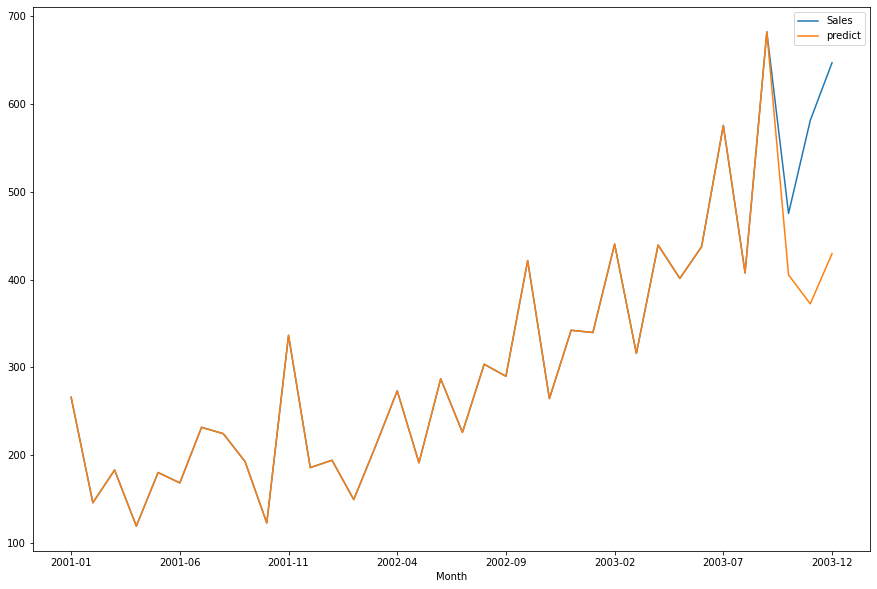

In [ ]:
# predict_shampoo.plot(y='Sales', use_index=True, figsize=(15, 10), subplots=True)
mlp_shampoo.plot(use_index=True, figsize=(15, 10), subplots=False)
plt.show()

### ◆ LSTM 모델 구축

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(10, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = lstm_model.fit(x_train_lstm, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 106191.1953 - mse: 106191.1953
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 106189.2734 - mse: 106189.2734
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 106187.3828 - mse: 106187.3828
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 106185.5469 - mse: 106185.5469
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 106183.7500 - mse: 106183.7500
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 106181.9453 - mse: 106181.9453
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 106180.1641 - mse: 106180.1641
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 106178.3750 - mse: 106178.3750
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 106176.5859 - mse: 106176.5859
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 10617

In [ ]:
lstm_pred = lstm_model.predict(x_test_lstm)
lstm_pred

array([[579.1795 ],
       [447.20602],
       [686.5534 ]], dtype=float32)

In [ ]:
lstm_shampoo = preprocessed_shampoo
lstm_shampoo['predict'] = lstm_shampoo['Sales']
lstm_pred = np.reshape(lstm_pred, (3))
lstm_shampoo.loc[-3:, 'predict'] = lstm_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [ ]:
%matplotlib inline
plt.close('all')

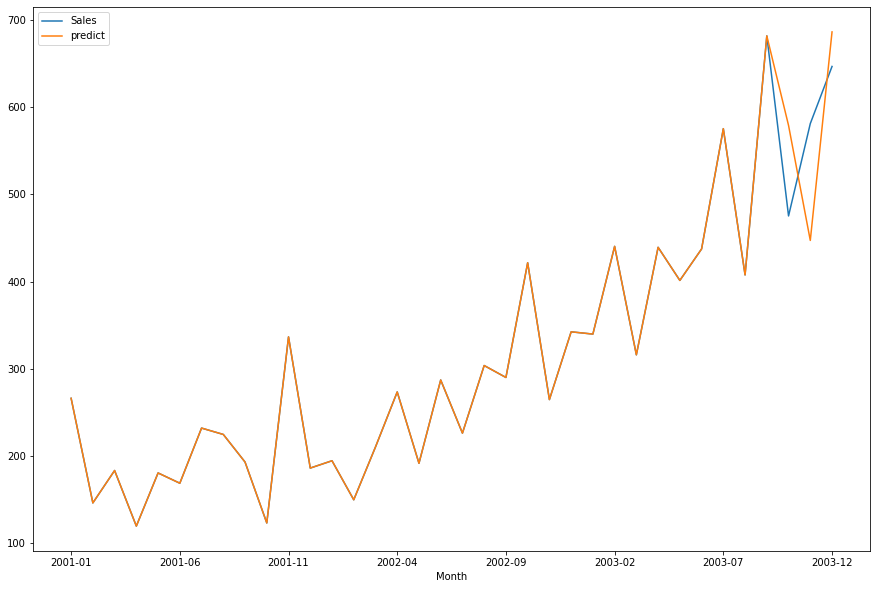

In [ ]:
lstm_shampoo.plot(use_index=True, figsize=(15, 10))
plt.show()

## 1-5) 결과 시각화 및 살펴보기


In [ ]:
%matplotlib inline
plt.close('all')

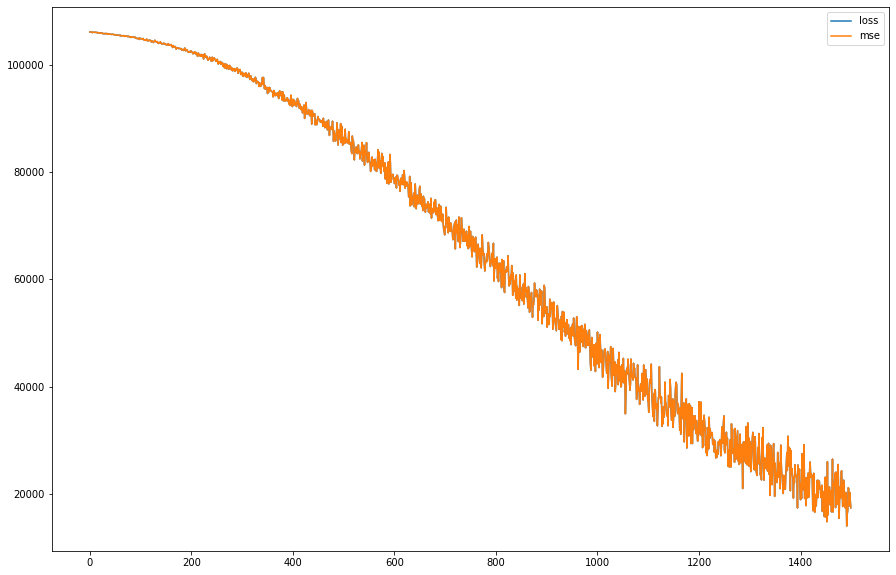

In [ ]:
mlp_history_df = pd.DataFrame(mlp_history.history)
mlp_history_df.plot(use_index=True, figsize=(15, 10))
plt.show()

In [ ]:
%matplotlib inline
plt.close('all')

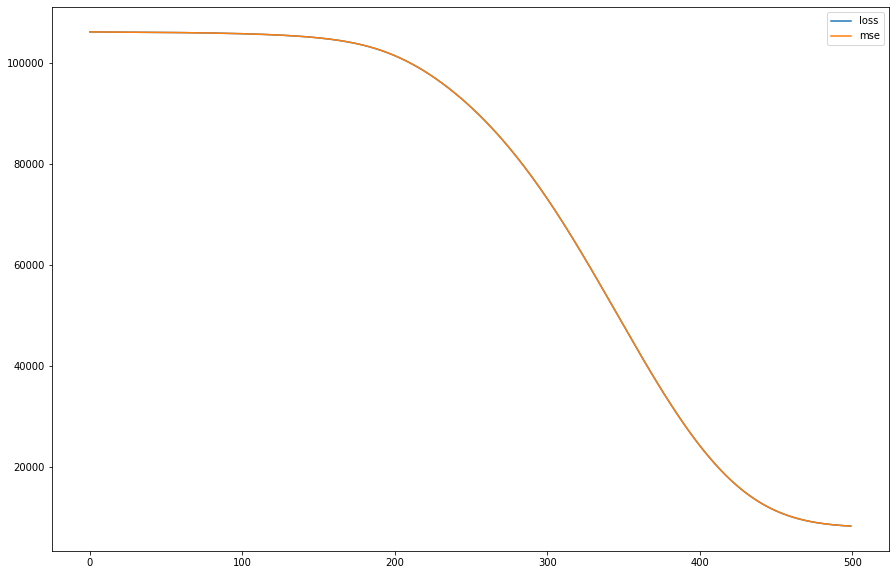

In [ ]:
lstm_history_df = pd.DataFrame(lstm_history.history)
lstm_history_df.plot(use_index=True, figsize=(15, 10))
plt.show()

# 2. 시계열 분류


## 2-1) 데이터셋 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
wafer_train = pd.read_csv('https://raw.githubusercontent.com/enopus/time-series-practice/main/wafer_train.csv', header=None)
wafer_train

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1.0,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.08,-1.080,-1.08,...,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.08,-1.080,-1.08
1,1.0,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.08,-1.080,-1.08,...,-1.110,-1.110,-1.120,-1.120,-1.120,-1.120,-1.120,-1.13,-1.130,-1.13
2,1.0,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.15,-1.150,-1.15,...,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.15,-1.150,-1.15
3,1.0,-1.660,-1.700,-1.710,-1.710,-1.710,-1.720,-1.72,-1.720,-1.72,...,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.15,-1.150,-1.15
4,1.0,-1.200,-1.200,-1.200,-1.200,-1.200,-1.200,-1.20,-1.200,-1.20,...,-1.190,-1.180,-1.180,-1.180,-1.180,-1.180,-1.170,-1.17,-1.170,-1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,1.0,1.060,1.060,1.080,1.060,1.080,1.080,1.06,1.060,1.08,...,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.06,1.060,1.06
6160,-1.0,-0.884,-1.040,-0.980,-1.010,-0.992,-1.000,-1.00,-0.996,-1.01,...,-1.000,-1.000,-0.999,-1.000,-0.997,-1.000,-0.992,-1.01,-0.980,-1.04
6161,-1.0,0.700,0.875,0.836,0.799,0.786,0.856,0.85,0.773,0.90,...,0.781,0.781,0.780,0.782,0.778,0.785,0.775,0.79,0.765,0.81
6162,1.0,-1.520,-1.580,-1.600,-1.610,-1.610,-1.610,-1.61,-1.610,-1.61,...,-1.060,-1.060,-1.060,-1.060,-1.060,-1.060,-1.060,-1.06,-1.060,-1.06


In [ ]:
wafer_test = pd.read_csv('https://raw.githubusercontent.com/enopus/time-series-practice/main/wafer_test.csv', header=None)
wafer_test

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1.0,-1.600,-1.670,-1.690,-1.700,-1.700,-1.700,-1.700,-1.700,-1.700,...,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150
1,1.0,1.080,1.080,1.080,1.070,1.070,1.070,1.070,1.070,1.070,...,1.070,1.070,1.070,1.070,1.070,1.070,1.070,1.070,1.070,1.070
2,1.0,0.363,0.363,0.363,0.393,0.363,0.363,0.363,0.363,0.363,...,0.393,0.393,0.393,0.363,0.393,0.393,0.393,0.393,0.393,0.393
3,1.0,-1.090,-1.090,-1.090,-1.100,-1.090,-1.100,-1.090,-1.090,-1.090,...,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100
4,1.0,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,...,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100,-1.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-1.620,-1.640,-1.650,-1.660,-1.660,-1.660,-1.660,-1.660,-1.660,...,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110
996,1.0,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,...,0.758,0.758,0.758,0.758,0.758,0.758,0.758,0.758,0.758,0.758
997,-1.0,-0.833,-0.977,-0.923,-0.954,-0.937,-0.946,-0.944,-0.939,-0.952,...,-0.942,-0.943,-0.941,-0.944,-0.939,-0.947,-0.935,-0.954,-0.923,-0.977
998,1.0,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.865,...,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930


## 2-2) 데이터 EDA 및 전처리

In [ ]:
wafer_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Length: 153, dtype: int64

In [ ]:
wafer_train.isna().sum().sum()

0

In [ ]:
%matplotlib inline
plt.close('all')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc966eee890>,
      dtype=object)

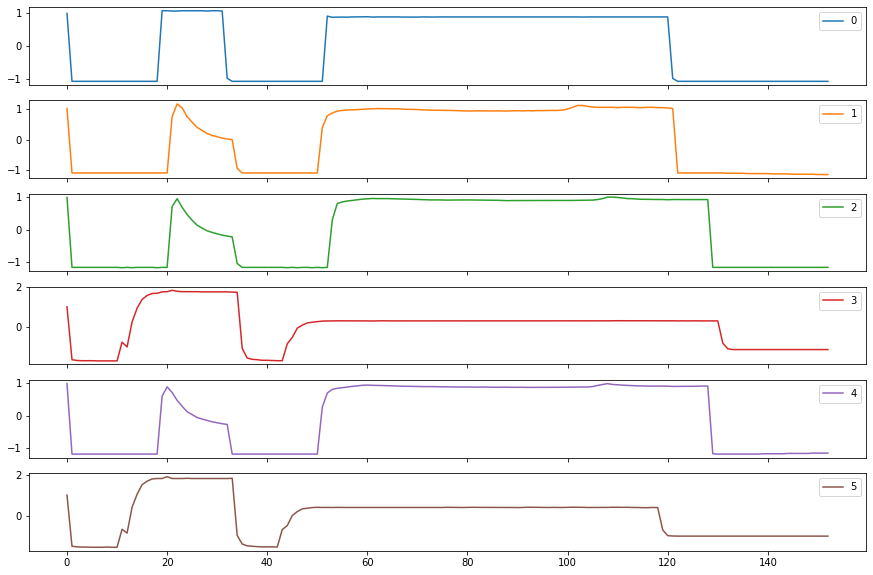

In [ ]:
wafer_sample = wafer_train.loc[:5, :]
wafer_sample = wafer_sample.transpose()
wafer_sample.plot(use_index=True, figsize=(15, 10), subplots=True)

In [ ]:
x_train = wafer_train.loc[:, 1:]
x_train

,1,2,3,4,5,6,7,8,9,10,...,143,144,145,146,147,148,149,150,151,152
0,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.08,-1.080,-1.08,-1.080,...,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.08,-1.080,-1.08
1,-1.080,-1.080,-1.080,-1.080,-1.080,-1.080,-1.08,-1.080,-1.08,-1.080,...,-1.110,-1.110,-1.120,-1.120,-1.120,-1.120,-1.120,-1.13,-1.130,-1.13
2,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.15,-1.150,-1.15,-1.150,...,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.15,-1.150,-1.15
3,-1.660,-1.700,-1.710,-1.710,-1.710,-1.720,-1.72,-1.720,-1.72,-1.720,...,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.150,-1.15,-1.150,-1.15
4,-1.200,-1.200,-1.200,-1.200,-1.200,-1.200,-1.20,-1.200,-1.20,-1.200,...,-1.190,-1.180,-1.180,-1.180,-1.180,-1.180,-1.170,-1.17,-1.170,-1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,1.060,1.060,1.080,1.060,1.080,1.080,1.06,1.060,1.08,1.080,...,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.06,1.060,1.06
6160,-0.884,-1.040,-0.980,-1.010,-0.992,-1.000,-1.00,-0.996,-1.01,-0.982,...,-1.000,-1.000,-0.999,-1.000,-0.997,-1.000,-0.992,-1.01,-0.980,-1.04
6161,0.700,0.875,0.836,0.799,0.786,0.856,0.85,0.773,0.90,0.763,...,0.781,0.781,0.780,0.782,0.778,0.785,0.775,0.79,0.765,0.81
6162,-1.520,-1.580,-1.600,-1.610,-1.610,-1.610,-1.61,-1.610,-1.61,-1.610,...,-1.060,-1.060,-1.060,-1.060,-1.060,-1.060,-1.060,-1.06,-1.060,-1.06


In [ ]:
y_train = wafer_train.loc[:, 0]
y_train

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6159    1.0
6160   -1.0
6161   -1.0
6162    1.0
6163    1.0
Name: 0, Length: 6164, dtype: float64

In [ ]:
x_test = wafer_test.loc[:, 1:]
y_test = wafer_test.loc[:, 0]

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

 1.0    5499
-1.0     665
Name: 0, dtype: int64
 1.0    903
-1.0     97
Name: 0, dtype: int64


In [ ]:
cond_test_ab = y_test == -1
cond_train_ab = y_train == -1

cond_test_nor = y_test == 1
cond_train_nor = y_train == 1

y_train[cond_train_nor]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6157    1.0
6158    1.0
6159    1.0
6162    1.0
6163    1.0
Name: 0, Length: 5499, dtype: float64

In [ ]:
y_train[cond_train_nor] = 0
y_train[cond_train_ab] = 1

y_test[cond_test_nor] = 0
y_test[cond_test_ab] = 1

print(y_test)
print(y_train)

print(y_test.value_counts())
print(y_train.value_counts())

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    1.0
998    0.0
999    0.0
Name: 0, Length: 1000, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6159    0.0
6160    1.0
6161    1.0
6162    0.0
6163    0.0
Name: 0, Length: 6164, dtype: float64
0.0    903
1.0     97
Name: 0, dtype: int64
0.0    5499
1.0     665
Name: 0, dtype: int64


In [ ]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train)
print(y_train)

[[0.38671329 0.38537549 0.38893528 ... 0.19708029 0.20416667 0.19585253]
 [0.33100233 0.36758893 0.35908142 ... 0.1703163  0.16911765 0.17511521]
 [0.8011655  0.76620553 0.78016701 ... 0.66107056 0.66348039 0.63986175]
 ...
 [0.83916084 0.79841897 0.81419624 ... 0.59318735 0.58970588 0.56543779]
 [0.83916084 0.79841897 0.81837161 ... 0.70559611 0.70833333 0.68202765]
 [0.8011655  0.77035573 0.78455115 ... 0.66107056 0.66348039 0.63986175]]
2232    1
1485    0
5645    0
5308    0
1606    0
       ..
990     0
975     0
3874    0
2774    0
1798    0
Name: 0, Length: 4931, dtype: int64


In [ ]:
x_train_mlp = np.array(x_train)

x_train_lstm = np.array(x_train)
x_train_lstm = np.reshape(x_train_lstm, (x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
print(x_train_lstm.shape)

(4931, 152, 1)


In [ ]:
x_test_mlp = np.array(x_test)

x_test_lstm = np.array(x_test)
x_test_lstm = np.reshape(x_test_lstm, (x_test_lstm.shape[0], x_test_lstm.shape[1], 1))


x_valid_mlp = np.array(x_valid)

x_valid_lstm = np.array(x_valid)
x_valid_lstm = np.reshape(x_valid_lstm, (x_valid_lstm.shape[0], x_valid_lstm.shape[1], 1))

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

## 2-3) 모델 생성 및 실행

In [ ]:
import tensorflow as tf
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
tf.random.set_seed(200)
np.random.seed(1)

### ◆ MLP 모델 구축

In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=x_train_mlp.shape[1], activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1, activation='sigmoid'))
adam_mlp = optimizers.adam_v2.Adam(lr=0.005)
mlp_model.compile(loss='binary_crossentropy', optimizer=adam_mlp, metrics=['acc'])
mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                9792      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
weight = {0: 1,
          1: 8}
# mlp_history = mlp_model.fit(x=x_train_mlp, y=y_train, validation_data=(x_valid_mlp, y_valid), epochs=30, class_weight=weight)

mlp_history = mlp_model.fit(x=x_train_mlp, y=y_train, validation_data=(x_valid_mlp, y_valid), epochs=30)


Epoch 1/30
155/155 [==============================] - 1s 4ms/step - loss: 0.2042 - acc: 0.9171 - val_loss: 0.0655 - val_acc: 0.9862
Epoch 2/30
155/155 [==============================] - 0s 2ms/step - loss: 0.0816 - acc: 0.9607 - val_loss: 0.0419 - val_acc: 0.9878
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 0.0704 - acc: 0.9767 - val_loss: 0.0359 - val_acc: 0.9911
Epoch 4/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0589 - acc: 0.9832 - val_loss: 0.0252 - val_acc: 0.9943
Epoch 5/30
155/155 [==============================] - 0s 2ms/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0398 - val_acc: 0.9903
Epoch 6/30
155/155 [==============================] - 0s 2ms/step - loss: 0.0456 - acc: 0.9842 - val_loss: 0.0308 - val_acc: 0.9903
Epoch 7/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0425 - acc: 0.9856 - val_loss: 0.0213 - val_acc: 0.9935
Epoch 8/30
155/155 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
mlp_eval = mlp_model.evaluate(x_test, y_test)
print(mlp_eval)

32/32 [==============================] - 0s 901us/step - loss: 0.0198 - acc: 0.9960
[0.019817693158984184, 0.9959999918937683]


### ◆ LSTM 모델 구축

In [ ]:
tf.random.set_seed(200)
np.random.seed(1)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(10, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))
adam_lstm = optimizers.adam_v2.Adam(lr=0.005)
lstm_model.compile(loss='binary_crossentropy', optimizer=adam_lstm, metrics=['acc'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
lstm_history = lstm_model.fit(x_train_lstm, y_train, validation_data=(x_valid_lstm, y_valid), epochs=10, class_weight=weight)

Epoch 1/10
155/155 [==============================] - 6s 35ms/step - loss: 1.2325 - acc: 0.3934 - val_loss: 0.7107 - val_acc: 0.5418
Epoch 2/10
155/155 [==============================] - 5s 33ms/step - loss: 1.2154 - acc: 0.6307 - val_loss: 0.6931 - val_acc: 0.6221
Epoch 3/10
155/155 [==============================] - 5s 34ms/step - loss: 1.2147 - acc: 0.6368 - val_loss: 0.6983 - val_acc: 0.6245
Epoch 4/10
155/155 [==============================] - 5s 34ms/step - loss: 1.2148 - acc: 0.6386 - val_loss: 0.6953 - val_acc: 0.6237
Epoch 5/10
155/155 [==============================] - 5s 33ms/step - loss: 1.2146 - acc: 0.6287 - val_loss: 0.6840 - val_acc: 0.6221
Epoch 6/10
155/155 [==============================] - 5s 33ms/step - loss: 1.2133 - acc: 0.7003 - val_loss: 0.6935 - val_acc: 0.6237
Epoch 7/10
155/155 [==============================] - 5s 33ms/step - loss: 1.2133 - acc: 0.6289 - val_loss: 0.6785 - val_acc: 0.6221
Epoch 8/10
155/155 [==============================] - 5s 33ms/step - 

In [ ]:
lstm_eval = lstm_model.evaluate(x_test_lstm, y_test)
print(lstm_eval)

32/32 [==============================] - 0s 7ms/step - loss: 0.6790 - acc: 0.6540
[0.6789654493331909, 0.6539999842643738]


In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

0    903
1     97
dtype: int64

In [ ]:
%matplotlib inline
plt.close('all')

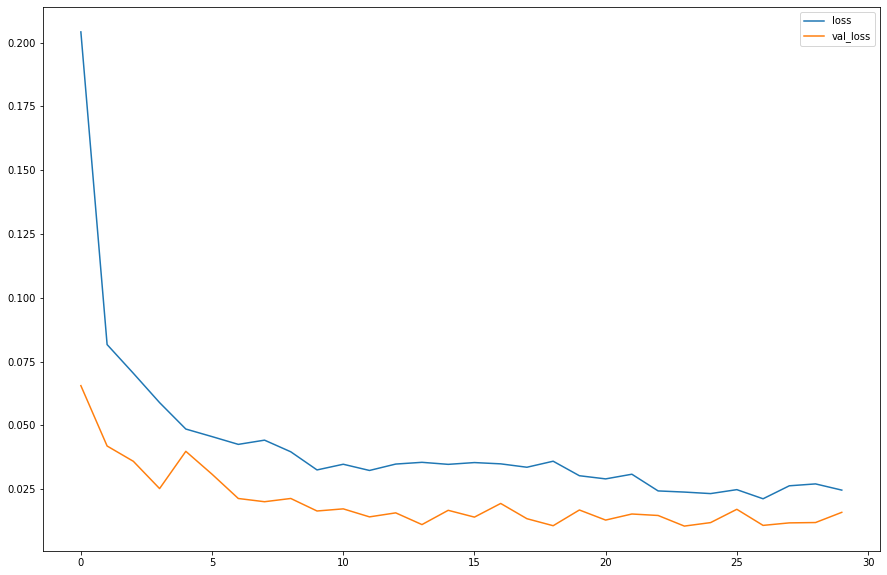

In [ ]:
mlp_history_df = pd.DataFrame(mlp_history.history)
mlp_history_df.plot(use_index=True, figsize=(15, 10), y=['loss', 'val_loss'])

In [ ]:
%matplotlib inline
plt.close('all')

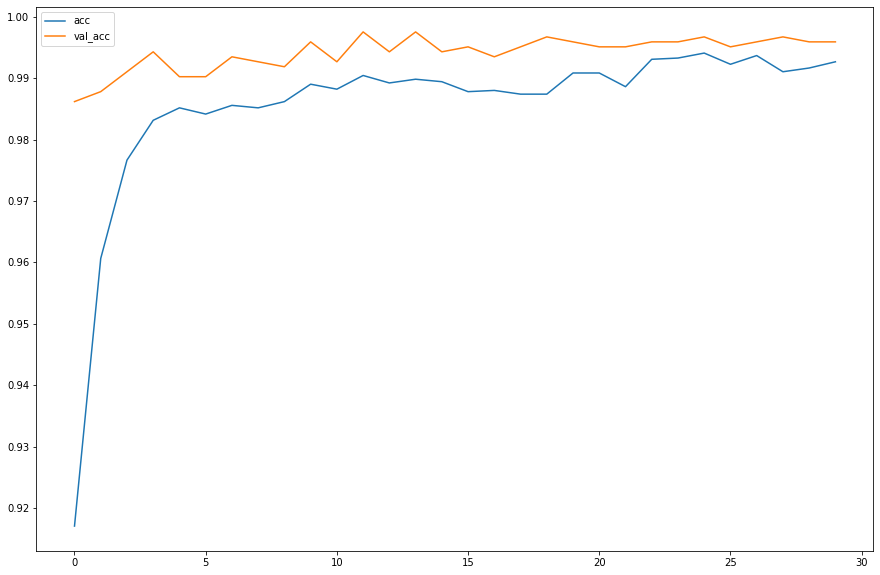

In [ ]:
mlp_history_df.plot(use_index=True, figsize=(15, 10), y=['acc', 'val_acc'])

In [ ]:
%matplotlib inline
plt.close('all')

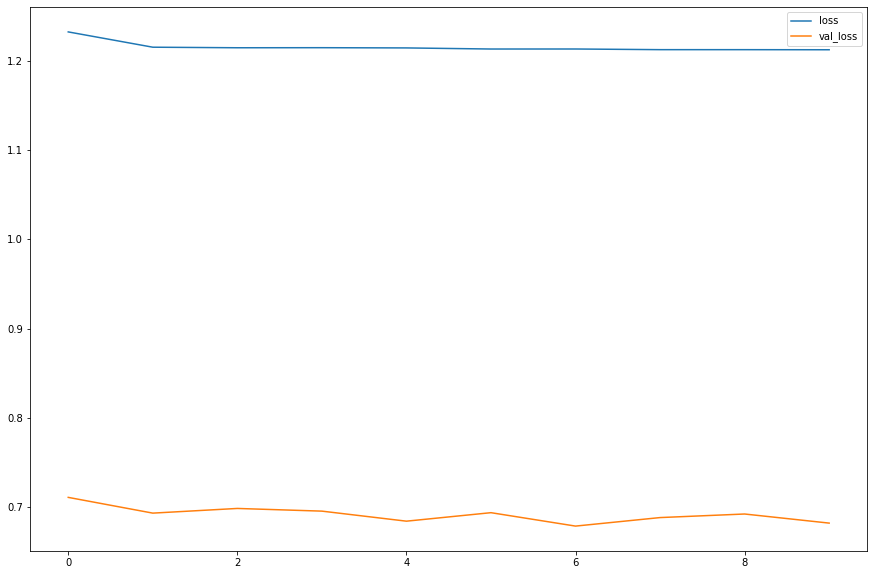

In [ ]:
lstm_history_df = pd.DataFrame(lstm_history.history)
lstm_history_df.plot(use_index=True, figsize=(15, 10), y=['loss', 'val_loss'])

In [ ]:
%matplotlib inline
plt.close('all')

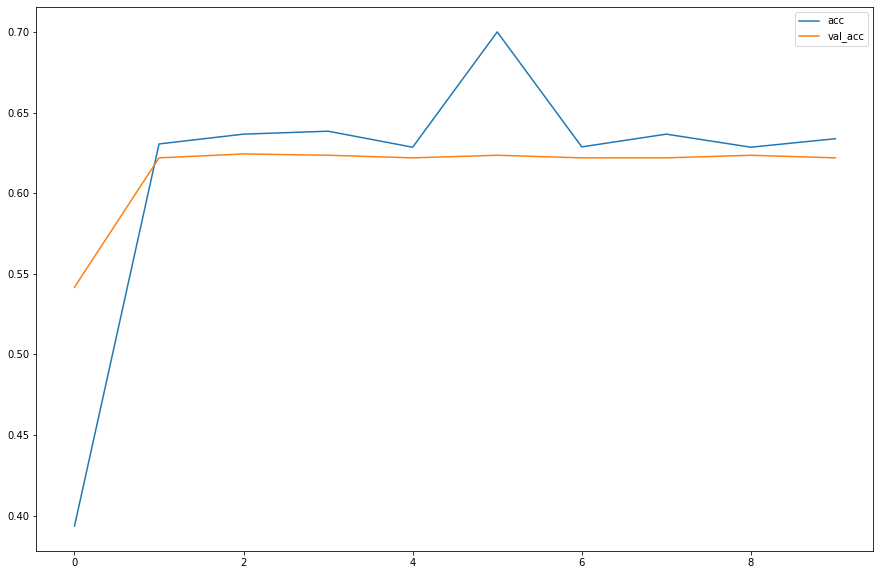

In [ ]:
lstm_history_df.plot(use_index=True, figsize=(15, 10), y=['acc', 'val_acc'])

## 2-4) 평가

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
def classifier_eval(y_test, y_pred):
    print('오차행렬 : ', confusion_matrix(y_test, y_pred))
    print('정확도   : ', accuracy_score(y_test, y_pred))
    print('정밀도   : ', precision_score(y_test, y_pred))
    print('재현율   : ', recall_score(y_test, y_pred))
    print('F1       : ', f1_score(y_test, y_pred))
    print('AUC      : ', roc_auc_score(y_test, y_pred))

In [ ]:
mlp_pred = mlp_model.predict(x_test_mlp)
mlp_pred[mlp_pred <= 0.5] = 0
mlp_pred[mlp_pred > 0.5] = 1

In [ ]:
lstm_pred = lstm_model.predict(x_test_lstm)
lstm_pred[lstm_pred <= 0.5] = 0
lstm_pred[lstm_pred > 0.5] = 1

In [ ]:
mlp_pred.astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
lstm_pred.astype(int)

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
classifier_eval(y_test, mlp_pred)

오차행렬 :  [[901   2]
 [  2  95]]
정확도   :  0.996
정밀도   :  0.979381443298969
재현율   :  0.979381443298969
F1       :  0.979381443298969
AUC      :  0.9885833019374136


In [ ]:
classifier_eval(y_test, lstm_pred)

오차행렬 :  [[625 278]
 [ 68  29]]
정확도   :  0.654
정밀도   :  0.09446254071661238
재현율   :  0.29896907216494845
F1       :  0.14356435643564355
AUC      :  0.4955531961046227
